In [1]:
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
data_com = pd.read_csv("cleandf_com.csv")

In [3]:
data_res = pd.read_csv("cleandf_res.csv")

In [4]:
data_res.head()

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Primary Property Type - Self Selected,Zip Code,LotArea,NumFloors,Weather Normalized Site EUI (kBtu/ft²),Oil,Diesel,Water,Gas,Electricity
0,0,18.67,1985,169061.0,0.0,1.0,1.000088e+09,Residential,10004.0,9053,19.0,139.2,1.0,0.0,0.0,0.0,0.0
1,1,12.91,1930,259076.0,0.0,0.0,1.000158e+09,Residential,10004.0,13928,45.0,41.3,0.0,0.0,0.0,0.0,1.0
2,2,4.31,1988,237270.0,5.0,0.0,1.000168e+09,Residential,10280.0,45203,9.0,98.7,0.0,0.0,0.0,1.0,0.0
3,3,5.28,1990,189273.0,5.0,0.0,1.000168e+09,Residential,10280.0,29850,9.0,121.1,0.0,0.0,0.0,1.0,0.0
4,4,16.61,2006,434680.0,0.0,1.0,1.000168e+09,Residential,10280.0,20763,35.0,79.7,0.0,0.0,0.0,1.0,0.0


In [5]:
data_res.shape

(5745, 17)

In [6]:
#data_res.dropna()


In [7]:
#data["Weather Normalized Source EUI (kBtu/ft²)"].nlargest(20)

In [8]:
#depedent variable 
#Electricity
#Electricity = data_res[['Weather Normalized Site Electricity (kWh)']]
#fig = plt.figure(figsize=(12,8))
#plt.scatter(Electricity.index,Electricity)

In [9]:
#data['Weather Normalized Site Electricity (kWh)'].nlargest(10)

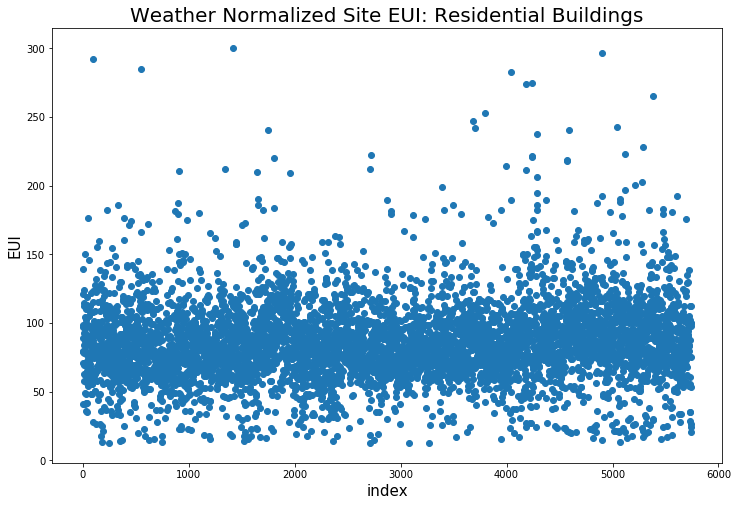

In [10]:
EUI = data_res[['Weather Normalized Site EUI (kBtu/ft²)']]
fig = plt.figure(figsize=(12,8))
plt.scatter(EUI.index,EUI)
plt.title('Weather Normalized Site EUI: Residential Buildings',fontsize = 20 )
plt.xlabel('index',fontsize = 15)
plt.ylabel('EUI',fontsize = 15)



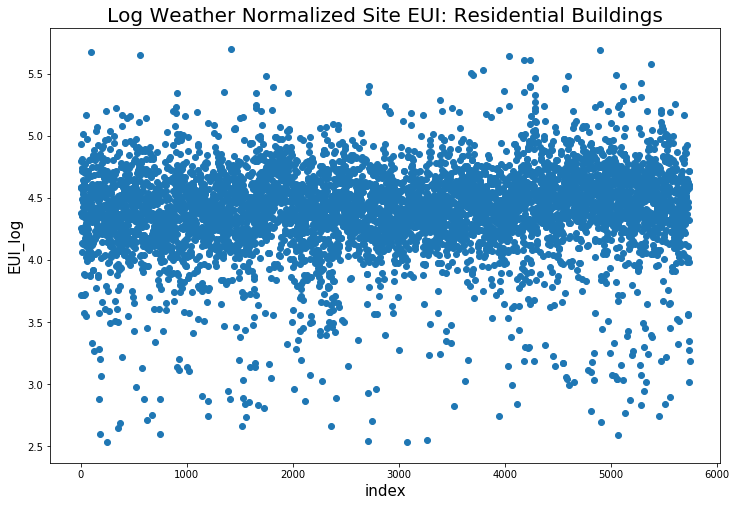

In [11]:
EUI_log = np.log(data_res[['Weather Normalized Site EUI (kBtu/ft²)']])
fig = plt.figure(figsize=(12,8))
plt.scatter(EUI_log.index,EUI_log)
plt.title('Log Weather Normalized Site EUI: Residential Buildings',fontsize = 20 )
plt.xlabel('index',fontsize = 15)
plt.ylabel('EUI_log',fontsize = 15)




In [12]:
data_res.columns

Index([u'Unnamed: 0', u'BuiltFAR', u'YearBuilt',
       u'DOF Property Floor Area (ft²)', u'LotType', u'ProxCode', u'BBL',
       u'Primary Property Type - Self Selected', u'Zip Code', u'LotArea',
       u'NumFloors', u'Weather Normalized Site EUI (kBtu/ft²)', u'Oil',
       u'Diesel', u'Water', u'Gas', u'Electricity'],
      dtype='object')

In [13]:
# remove BLL and zipcode and dependent variable
X = data_res.drop(['Unnamed: 0',\
                  'Weather Normalized Site EUI (kBtu/ft²)','BBL',\
                  'Primary Property Type - Self Selected'],axis = 1)

In [14]:
X['Age'] = 2017 - X.YearBuilt

In [18]:
X = X.drop(['YearBuilt'], axis = 1)
X.columns

Index([u'BuiltFAR', u'DOF Property Floor Area (ft²)', u'LotType', u'ProxCode',
       u'Zip Code', u'LotArea', u'NumFloors', u'Oil', u'Diesel', u'Water',
       u'Gas', u'Electricity', u'Age', u'log_Age'],
      dtype='object')

In [21]:
# Log_Age
X_1 = X
X_1['log_Age'] = np.log(X['Age'])
X_1 = X_1.drop(['Age'], axis = 1)
#X_1

In [22]:
#According to the feature ranking in random forest
#X1 = data[['District Steam Use (kBtu)','ResArea','Electricity Use - Grid Purchase (kBtu)',\
#           'Weather Normalized Site Natural Gas Use (therms)','Natural Gas Use (kBtu)',\
#          'DOF Property Floor Area (ft²)']]

In [23]:
#replace Not Available with zero
#X['Fuel Oil #1 Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['Fuel Oil #2 Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['Fuel Oil #4 Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['Fuel Oil #5 & 6 Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['Diesel #2 Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['District Hot Water Use (kBtu)'].replace('Not Available', 0, inplace=True)
#X['District Chilled Water Use (kBtu)'].replace('Not Available', 0, inplace=True)
X.replace('Not Available', 0, inplace=True)
X_1.replace('Not Available', 0, inplace=True)



In [24]:
#X1['District Steam Use (kBtu)'].replace('Not Available', 0, inplace=True)

In [25]:
import numpy as np
from sklearn.svm import SVR

# fit the model

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
#svr_poly = SVR(kernel='poly')


In [26]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
# EUI vs age
X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI, test_size = 0.3, random_state =999)

In [28]:
Eui_rbf = svr_rbf.fit(X_train, y_train)
Eui_rbf.score(X_test,y_test)
#Eui_lin = svr_lin.fit(X, EUI).predict(X)
#Eui_poly = svr_poly.fit(X, EUI).predict(X)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.0075474681018001801

In [29]:
#EUI, age
X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Input parameters ranges to cross validation 
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))


Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.0, 'C': 1, 'gamma': 0.0001}
The test score R2 for SVR:  -0.00747449820218
SVR mean squared error: 803.07


In [35]:
#Log EUI vs. age
X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI_log, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [36]:
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))



Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.1, 'C': 1, 'gamma': 0.01}
The test score R2 for SVR:  -0.00427098697971
SVR mean squared error: 0.13


In [38]:
#Log EUI vs. log age
X_train, X_test, y_train, y_test = train_test_split(X_1,
                           EUI_log, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [39]:
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))



Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.1, 'C': 1, 'gamma': 0.001}
The test score R2 for SVR:  -0.00969460725809
SVR mean squared error: 0.14


In [170]:
svr_rbf = SVR(kernel='rbf',epsilon = 0.0, C = 1, gamma = 0.0001).fit(XX_train, yy_train)
y_elect = svr_rbf.predict(XX_test)

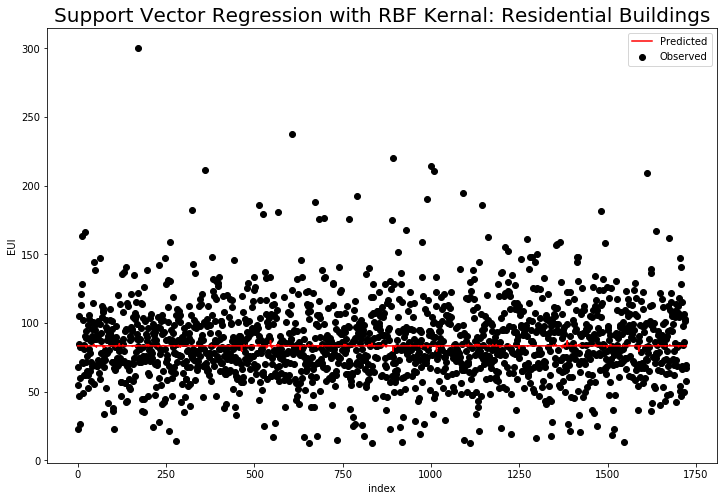

In [171]:
fig = plt.figure(figsize=(12,8))
plt.scatter(XX_test.index,yy_test, c='k', label='Observed')
plt.plot(XX_test.index, y_elect, c='r', label='Predicted')
plt.xlabel('index')
plt.ylabel('EUI')
plt.title('Support Vector Regression with RBF Kernal: Residential Buildings',fontsize = 20)
plt.legend()


In [42]:
# Cross viladation: EUI vs age
OS_svm = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI, test_size = 0.3, random_state = i*200)
    yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    svr_rbf = SVR(kernel='rbf', epsilon = 0.0, C = 1, gamma = 0.0001)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((yy_test - svr_rbf.fit(X_train, y_train).predict(XX_test)) ** 2))
    

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))

The test score R2 for SVR:
-0.00615788159923
SVR mean squared error: 841.76


In [37]:
# Cross viladation: EUI_log vs age
OS_svm = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,
                           EUI_log, test_size = 0.3, random_state = i*200)
    svr_rbf = SVR(kernel='rbf', epsilon = 0.1, C = 1, gamma = 0.01)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    #OS_svm.append(1-((svr_rbf.predict(X_test)-y_test.values.T)**2).mean()/y_test.var())

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))

The test score R2 for SVR:
-0.00512888926687


In [40]:
# Cross viladation: EUI_log vs age_log
OS_svm = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_1,
                           EUI_log, test_size = 0.3, random_state = i*200)
    svr_rbf = SVR(kernel='rbf', epsilon = 0.1, C = 1, gamma = 0.001)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    #OS_svm.append(1-((svr_rbf.predict(X_test)-y_test.values.T)**2).mean()/y_test.var())

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))

The test score R2 for SVR:
-0.00790477894079


In [43]:
data_com.shape

(667, 17)

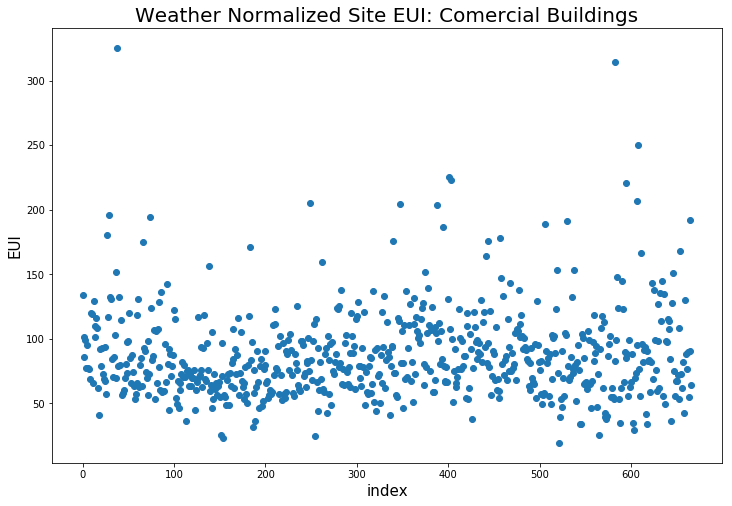

In [44]:
EUI_com = data_com[['Weather Normalized Site EUI (kBtu/ft²)']]
fig = plt.figure(figsize=(12,8))
plt.scatter(EUI_com.index,EUI_com)
plt.title('Weather Normalized Site EUI: Comercial Buildings',fontsize = 20 )
plt.xlabel('index',fontsize = 15)
plt.ylabel('EUI',fontsize = 15)

In [45]:
X_com = data_com.drop(['Unnamed: 0',\
                  'Weather Normalized Site EUI (kBtu/ft²)','BBL',\
                  'Primary Property Type - Self Selected'],axis = 1)

In [46]:
X_com['Age'] = 2017 - X_com.YearBuilt

In [47]:
X_com.drop(['YearBuilt'], axis = 1)
X_com.columns

Index([u'BuiltFAR', u'YearBuilt', u'DOF Property Floor Area (ft²)', u'LotType',
       u'ProxCode', u'Zip Code', u'LotArea', u'NumFloors', u'Oil', u'Diesel',
       u'Water', u'Gas', u'Electricity', u'Age'],
      dtype='object')

In [48]:
X_com1 = X_com[X_com['Age'] > 0]
X_com1.shape

(667, 14)

In [49]:
X_com.replace('Not Available', 0, inplace=True)

In [50]:
Xcom_train, Xcom_test, ycom_train, ycom_test = train_test_split(X_com,
                           EUI_com, test_size = 0.3, random_state =999)
Eui_rbf = svr_rbf.fit(Xcom_train, ycom_train)
Eui_rbf.score(Xcom_test,ycom_test)

-0.015789642197788112

In [51]:
Xcom_train, Xcom_test, ycom_train, ycom_test = train_test_split(X_com,
                           EUI_com, test_size = 0.3, random_state =999)
Eui_lin = svr_lin.fit(Xcom_train, ycom_train)
Eui_lin.score(Xcom_test,ycom_test)

-427226.24538360146

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_com,
                           EUI_com, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [84]:
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))



Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.0, 'C': 501, 'gamma': 0.01}
The test score R2 for SVR:  -0.00891462197848
SVR mean squared error: 1118.99


In [165]:
svr_rbf = SVR(kernel='rbf',epsilon = 0.0, C = 501, gamma = 0.01).fit(XX_train, yy_train)
y_elect = svr_rbf.predict(XX_test)

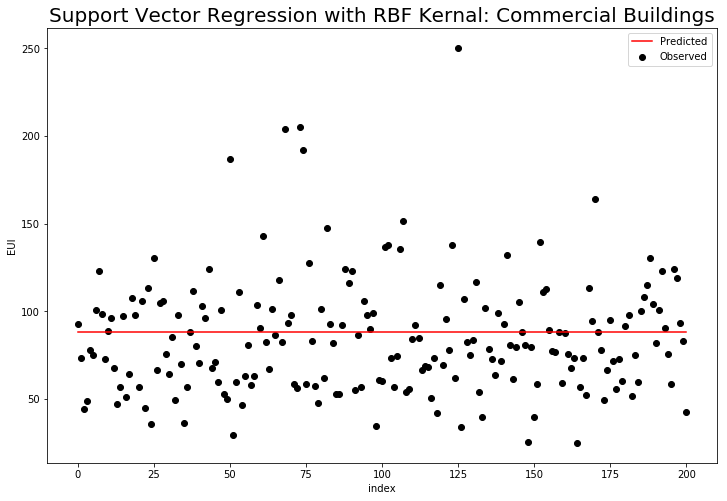

In [167]:
fig = plt.figure(figsize=(12,8))
plt.scatter(XX_test.index,yy_test, c='k', label='Observed')
plt.plot(XX_test.index, y_elect, c='r', label='Predicted')
plt.xlabel('index')
plt.ylabel('EUI')
plt.title('Support Vector Regression with RBF Kernal: Commercial Buildings',fontsize = 20)
plt.legend()



In [52]:
# Cross viladation
OS_svm = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_com,
                           EUI_com, test_size = 0.3, random_state =i)
    yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    svr_rbf = SVR(kernel='rbf', C = 501, gamma = 0.01)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((yy_test - svr_rbf.fit(X_train, y_train).predict(XX_test)) ** 2))

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))

The test score R2 for SVR:
-0.00432854888138
SVR mean squared error: 1181.74


In [53]:
### Feature selection using SVM
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
# load data

# feature extraction
estimator = SVR(kernel="linear")
#model = SVR(kernel='rbf', C = 501, gamma = 0.01)
selector = RFE(estimator, 6, step=1)
selector = selector.fit(X_com, EUI_com)
#rfe = RFE(model, 3)
#fit = rfe.fit(X_com,EUI_com)
print("Num Features: %d") % selector.n_features_
print("Selected Features: %s") % selector.support_
print("Feature Ranking: %s") % selector.ranking_

Num Features: 6
Selected Features: [False False False  True  True False False False  True False  True  True
  True False]
Feature Ranking: [2 4 7 1 1 6 8 3 1 9 1 1 1 5]


In [54]:
names = np.array(X_com.columns) 
print('Feature selected:')
names[selector.support_] 

Feature selected:


array(['LotType', 'ProxCode', 'Oil', 'Water', 'Gas', 'Electricity'], dtype=object)

In [55]:
X_com_elect = X_com[names[selector.support_]]
#X_com_elect['BuiltFAR'] = X_com['BuiltFAR']
X_com_elect.head()

,LotType,ProxCode,Oil,Water,Gas,Electricity
0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,3.0,0.0,0.0,0.0,1.0
2,5.0,0.0,0.0,0.0,0.0,1.0
3,4.0,3.0,0.0,0.0,0.0,1.0
4,3.0,2.0,0.0,0.0,0.0,1.0


In [70]:
Xcom_train, Xcom_test, ycom_train, ycom_test = train_test_split(X_com_elect,
                           EUI_com, test_size = 0.3, random_state =999)
Eui_lin = svr_lin.fit(Xcom_train, ycom_train)
Eui_lin.score(Xcom_test,ycom_test)

0.057683707529373913

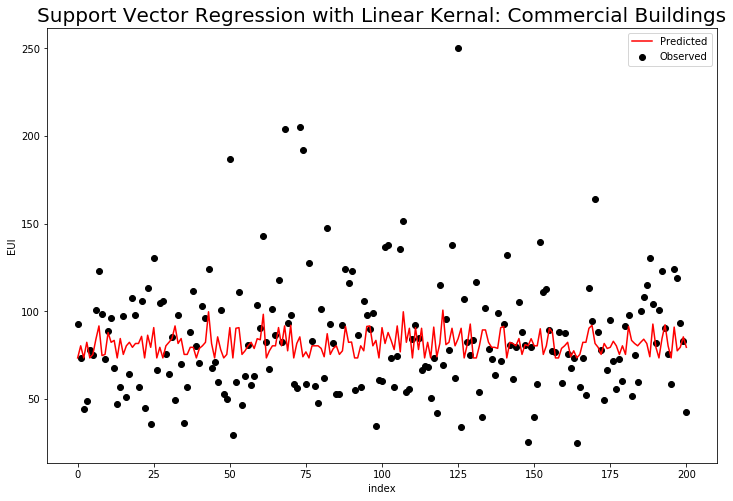

In [162]:
XX_test = Xcom_test.reset_index().drop('index', axis = 1)

fig = plt.figure(figsize=(12,8))
plt.scatter(XX_test.index, ycom_test, c='k', label='Observed')
plt.plot(XX_test.index, Eui_lin.predict(Xcom_test), c='r', label='Predicted')
plt.xlabel('index')
plt.ylabel('EUI')
plt.title('Support Vector Regression with Linear Kernal: Commercial Buildings',fontsize = 20)
plt.legend()



In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_com_elect,
                           EUI_com, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [111]:
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))



Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.0, 'C': 2001, 'gamma': 0.01}
The test score R2 for SVR:  0.113099437021
SVR mean squared error: 983.67


In [113]:
svr_rbf = SVR(kernel='rbf', C = 2001, gamma = 0.01, epsilon = 0.0)

In [127]:
#RBF with feature selected
Xcom_train, Xcom_test, ycom_train, ycom_test = train_test_split(X_com_elect,
                           EUI_com, test_size = 0.3, random_state = 999)
Eui_rbf = svr_rbf.fit(Xcom_train, ycom_train)
Eui_rbf.score(Xcom_test,ycom_test)

0.11309943702058101

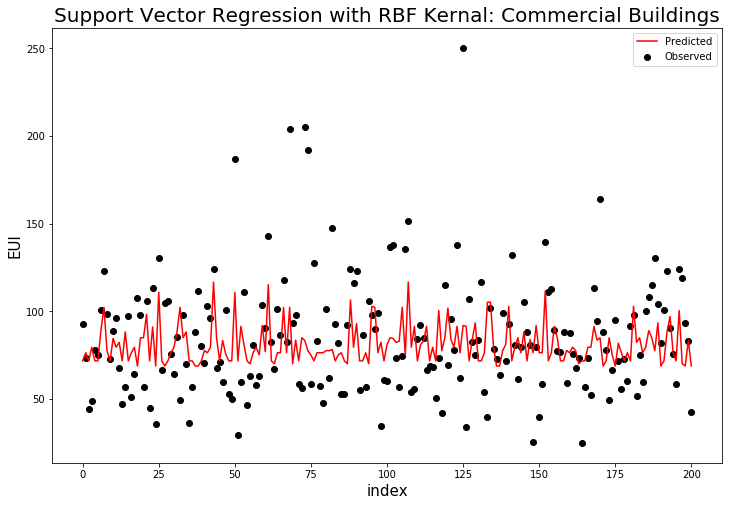

In [122]:
XX_test = Xcom_test.reset_index().drop('index', axis = 1)

fig = plt.figure(figsize=(12,8))
plt.scatter(XX_test.index, ycom_test, c='k', label='Observed')
plt.plot(XX_test.index, Eui_rbf.predict(Xcom_test), c='r', label='Predicted')
plt.xlabel('index',fontsize = 15)
plt.ylabel('EUI',fontsize = 15)
plt.title('Support Vector Regression with RBF Kernal: Commercial Buildings',fontsize = 20)
plt.legend()





In [56]:
# Cross viladation
OS_svm = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_com_elect,
                           EUI_com, test_size = 0.3, random_state = i+900)
    yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    svr_rbf = SVR(kernel='rbf', C = 2001, gamma = 0.01, epsilon = 0.0)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((yy_test - svr_rbf.fit(X_train, y_train).predict(XX_test)) ** 2))

print('The test score R2 for SVR:')        
print(np.mean(OS_svm))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))   


The test score R2 for SVR:
0.0769259150584
SVR mean squared error: 1216.09


In [144]:
# Cross viladation
OS_svm = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_com_elect,
                           EUI_com, test_size = 0.3, random_state = i+900)
    svr_lin = SVR(kernel='linear')
    OS_svm.append(svr_lin.fit(X_train, y_train).score(X_test,y_test))  
    #OS_svm.append(1-((svr_rbf.predict(X_test)-y_test.values.T)**2).mean()/y_test.var())
print('The test score R2 for SVR:')    
print(np.mean(OS_svm)*100)


The test score R2 for SVR:
4.98962376239


In [57]:
#X of Residential with the feature selected
X_Res_elect = X[names[selector.support_]]
#X_com_elect['BuiltFAR'] = X_com['BuiltFAR']
X_Res_elect.head()

,LotType,ProxCode,Oil,Water,Gas,Electricity
0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,5.0,0.0,0.0,0.0,1.0,0.0
3,5.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_Res_elect,
                           EUI, test_size = 0.3, random_state =999)
XX_train = X_train.reset_index().drop('index', axis = 1)
XX_test = X_test.reset_index().drop('index', axis = 1)

yy_train = y_train['Weather Normalized Site EUI (kBtu/ft²)']
yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']

In [99]:
# Input parameters ranges to cross validation 
gamma_range = [0.01, 0.001, 0.0001]
epsilon_range = [x * 0.1 for x in range(0, 2)]
C_range = range(1, 2500, 500)

# To speed up, we first find the optimal paratemers for C and gamma and then set them directly in the method call
tuned_parameters = [{
    #'kernel': ['rbf', 'linear'],
    'C': C_range,
    'gamma': gamma_range,
    'epsilon': epsilon_range}]

# search for the best parameters with crossvalidation.
svr_elect = GridSearchCV(SVR(kernel='rbf'), param_grid = tuned_parameters, verbose = 0)

# Fit regression model
y_elect = svr_elect.fit(XX_train, yy_train).predict(XX_test)

print 'Optimum parameters C, epsilon and gamma for SVR: ', svr_elect.best_params_

print "The test score R2 for SVR: ", svr_elect.score(XX_test, yy_test)

print("SVR mean squared error: %.2f"
      % np.mean((yy_test - svr_elect.predict(XX_test)) ** 2))



Optimum parameters C, epsilon and gamma for SVR:  {'epsilon': 0.0, 'C': 501, 'gamma': 0.01}
The test score R2 for SVR:  0.127171617963
SVR mean squared error: 695.74


In [102]:
#svr_rbf = SVR(kernel='rbf', C = 1, gamma = 0.0001)
svr_rbf = SVR(kernel='rbf',epsilon = 0.0, C = 501, gamma = 0.01)

In [103]:
Xres_train, Xres_test, yres_train, yres_test = train_test_split(X_Res_elect,
                           EUI, test_size = 0.3, random_state =999)
Eui_rbf = svr_rbf.fit(Xres_train, yres_train)
Eui_rbf.score(Xres_test,yres_test)

0.12717161796298759

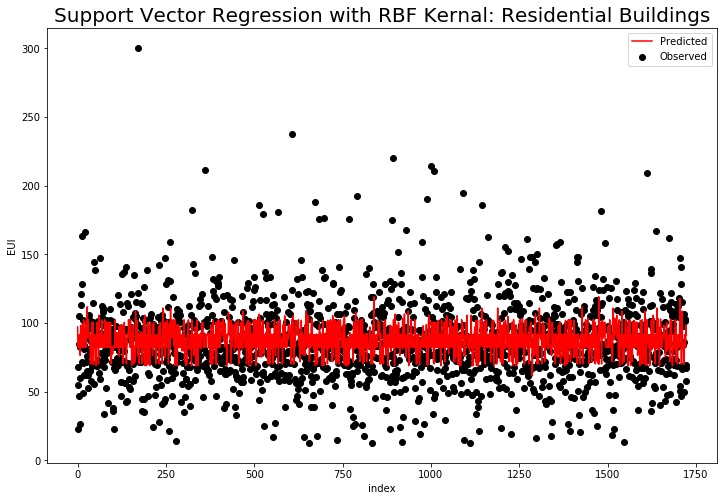

In [123]:
XX_test = Xres_test.reset_index().drop('index', axis = 1)

fig = plt.figure(figsize=(12,8))
plt.scatter(XX_test.index, yres_test, c='k', label='Observed')
plt.plot(XX_test.index, Eui_rbf.predict(Xres_test), c='r', label='Predicted')
plt.xlabel('index')
plt.ylabel('EUI')
plt.title('Support Vector Regression with RBF Kernal: Residential Buildings',fontsize = 20)
plt.legend()






In [59]:
# Cross viladation
OS_svm = []
OS_mse = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_Res_elect,
                           EUI, test_size = 0.3, random_state = i+1000)
    yy_test = y_test['Weather Normalized Site EUI (kBtu/ft²)']
    XX_test = X_test.reset_index().drop('index', axis = 1)
    svr_rbf = SVR(kernel='rbf', C = 501, gamma = 0.01)
    OS_svm.append(svr_rbf.fit(X_train, y_train).score(X_test,y_test))  
    OS_mse.append(np.mean((yy_test - svr_rbf.fit(X_train, y_train).predict(XX_test)) ** 2))

print('The test score R2 for SVR:')    
print(np.mean(OS_svm))
print("SVR mean squared error: %.2f"
      %np.mean(OS_mse))   



The test score R2 for SVR:
0.110549964775
SVR mean squared error: 737.52
